<a href="https://colab.research.google.com/github/mirzarayhan/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
masukkan nilai kecerahan:  60


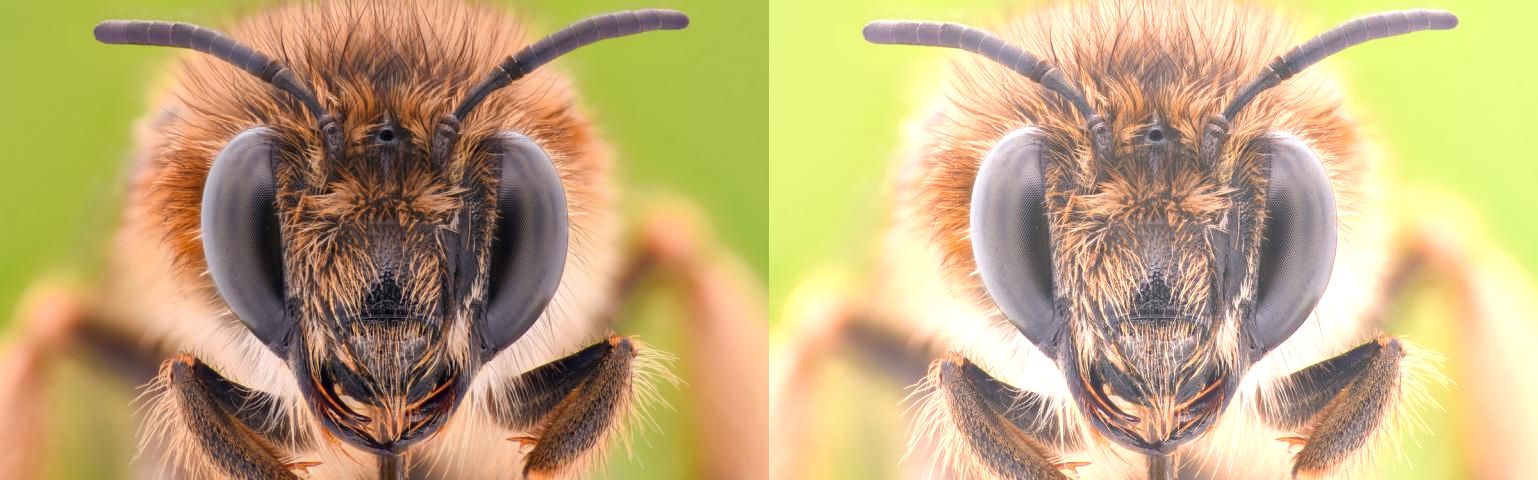

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try : 
  brightness = int(input('masukkan nilai kecerahan:  '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Gambar/SIERRA Bees WB.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c]+brightness, 0, 255)


final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra 
----------------------------------
masukkan nilai kecerahan [-255 - 255]:  60
masukkan nilai kontras [1.0-3.0]:  1.5


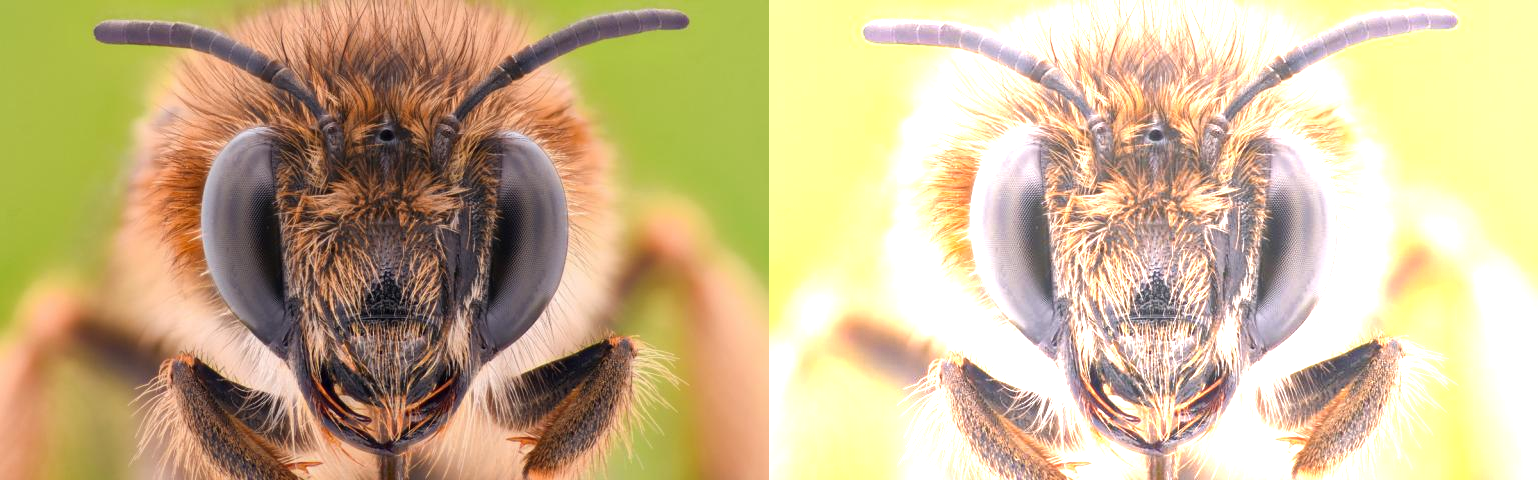

In [4]:
# Nomor 1
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try : 
  brightness = int(input('masukkan nilai kecerahan [-255 - 255]:  '))
  contrast = float(input('masukkan nilai kontras [1.0-3.0]:  '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Gambar/SIERRA Bees WB.jpg')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
        contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra 
----------------------------------
masukkan nilai kecerahan [-255 - 255]:  40


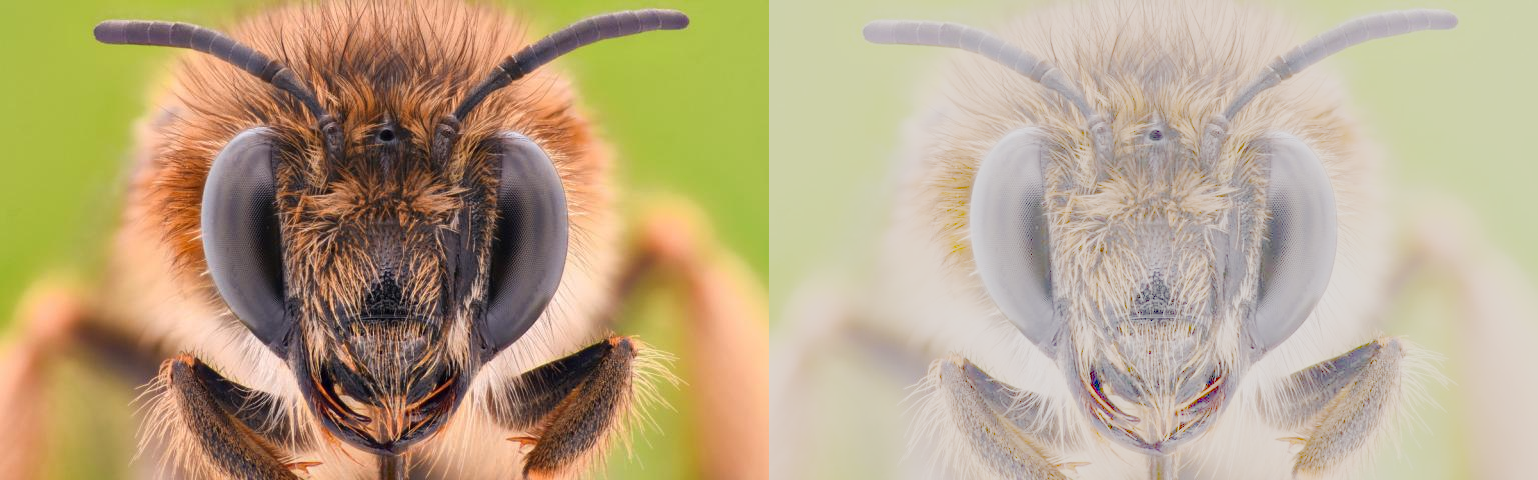

In [5]:
# Nomor 2

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try : 
  brightness = int(input('masukkan nilai kecerahan [-255 - 255]:  '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Gambar/SIERRA Bees WB.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
        brightness_image[y,x,c] = np.clip(brightness*(np.log(1+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

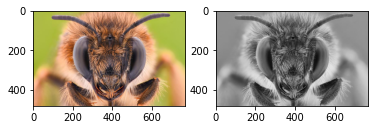

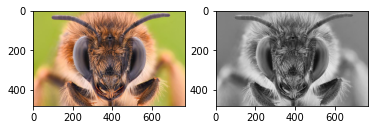

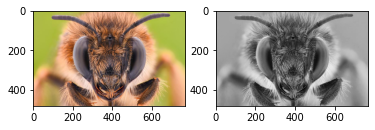

In [7]:
# Nomor 3
img_bgr = cv.imread('/content/drive/MyDrive/Gambar/SIERRA Bees WB.jpg')
img = cv.cvtColor(img_bgr,cv.COLOR_BGR2RGB)
# A
img_avg = cv.imread('/content/drive/MyDrive/Gambar/SIERRA Bees WB.jpg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img_avg)

# B
img_light = cv.imread('/content/drive/MyDrive/Gambar/SIERRA Bees WB.jpg')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img_light)
# C

img_lum = cv.imread('/content/drive/MyDrive/Gambar/SIERRA Bees WB.jpg')
R, G, B = img_lum[:,:,0], img_lum[:,:,1], img[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(gray_image_lum, cmap='gray')



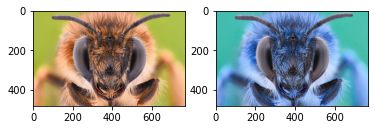

In [12]:
# Nomor 4
img_4 = cv.imread('/content/drive/MyDrive/Gambar/SIERRA Bees WB.jpg')
ret, mask = cv.threshold(img_4[:,:,2], 255, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2HLS)
img_4 = cv.cvtColor(gray, cv.COLOR_HLS2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(out, cmap='autumn_r')